In [1]:
%pip install ipywidgets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

Note: you may need to restart the kernel to use updated packages.


In [2]:
df_conf = pd.read_csv("C:/Users/Aatif/Desktop/Covid 19 Project/Data/time_series_covid19_confirmed_global.csv")
df_deaths = pd.read_csv("C:/Users/Aatif/Desktop/Covid 19 Project/Data/time_series_covid19_deaths_global.csv")
df_recovered = pd.read_csv("C:/Users/Aatif/Desktop/Covid 19 Project/Data/time_series_covid19_recovered_global.csv")

In [3]:
def melt_df(df, value_name):
    df = df.drop(columns=["Province/State", "Lat", "Long"])
    df = df.melt(id_vars="Country/Region", var_name="Date", value_name=value_name)
    df["Date"] = pd.to_datetime(df["Date"])
    return df

In [5]:
conf = melt_df(df_conf, "Confirmed")
deaths = melt_df(df_deaths, "Deaths")
recovered = melt_df(df_recovered, "Recovered")

C:\Users\Aatif\AppData\Local\Temp\ipykernel_13356\401397756.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])
C:\Users\Aatif\AppData\Local\Temp\ipykernel_13356\401397756.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])
C:\Users\Aatif\AppData\Local\Temp\ipykernel_13356\401397756.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


In [6]:
df = conf.merge(deaths, on=["Country/Region", "Date"]) \
            .merge(recovered, on=["Country/Region", "Date"])

In [8]:
global_ts = df.groupby("Date")[["Confirmed", "Deaths", "Recovered"]].sum()
global_daily = global_ts.diff().fillna(0)

In [9]:
global_daily["Rolling7"] = global_daily["Confirmed"].rolling(7).mean()

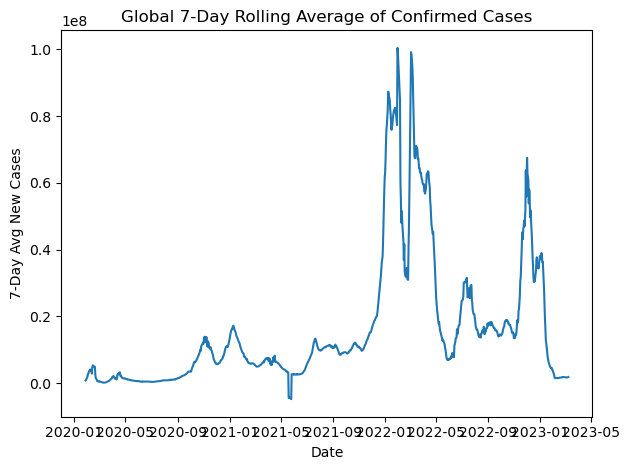

In [10]:
plt.figure()
plt.plot(global_daily.index, global_daily["Rolling7"])
plt.title("Global 7-Day Rolling Average of Confirmed Cases")
plt.xlabel("Date")
plt.ylabel("7-Day Avg New Cases")
plt.tight_layout()
plt.show()

In [11]:
fig = px.line(global_ts.reset_index(),
              x="Date", y=["Confirmed", "Deaths", "Recovered"],
              title="Global Cumulative Covid-19 Cases",
              labels={"value":"Count", "variable":"Metric"})

fig.update_layout(hovermode="x unified")
fig.show()

In [12]:
latest= df[df["Date"] == df["Date"].max()]
top10 = (latest.groupby("Country/Region")["Confirmed"]
                .sum()
                .nlargest(10))

In [13]:
fig2 = px.bar(top10.reset_index(),
              x = "Country/Region", y="Confirmed",
              title="Top 10 Countries by Confirmed Cases")

fig2.update_layout(xaxis_tickangle=-45)
fig2.show()

In [15]:
countries = sorted(df["Country/Region"].unique())
dropdown = widgets.Dropdown(options=countries, value="US", description="Country:")

def plot_country(country):
    cts = df[df["Country/Region"]==country].groupby("Date")[["Confirmed", "Deaths"]].sum()
    cts_daily = cts.diff().fillna(0)
    cts_daily["Rolling7"] = cts_daily["Confirmed"].rolling(7).mean()
    
    fig = px.line(cts_daily.reset_index(),
                  x="Date", y=["Confirmed", "Rolling7"],
                  title = f"{country}: Daily & 7-Day Avg New Cases",
                  labels={"value":"Cases", "variable":"Metric"})
    
    fig.show()
    
widgets.interact(plot_country, country=dropdown)

interactive(children=(Dropdown(description='Country:', index=186, options=('Afghanistan', 'Albania', 'Algeria'…

<function __main__.plot_country(country)>

In [16]:
mortality = (global_ts["Deaths"] / global_ts["Confirmed"]) * 100

fig3 = px.line(x=global_ts.index, y=mortality,
               title = "Global Covid-19 Mortality Rate (%)",
               labels = {"x":"Date", "y":"Mortality Rate (%)"})

fig3.show()


In [19]:
global_daily.to_csv("C:/Users/Aatif/Desktop/Covid 19 Project/Data/global_daily_timeseries.csv")
top10.to_csv("C:/Users/Aatif/Desktop/Covid 19 Project/Data/top10_countries.csv")